## Imports and data loading

In [1]:
import utils
import models

In [2]:
learning_data_path = "data/learning_data.pkl"

In [3]:
import pickle
print("Loading data...")
with (open(learning_data_path, "rb") as file):
    (x_train, x_test, y_train, y_test) = pickle.load(file)
print("All data loaded!")

Loading data...
All data loaded!


In [4]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    9578
1    4789
Name: count, dtype: int64

## Pre-processing

In [5]:
# Imputation of missing values
x_train = utils.impute_missing_values(x_train)
x_test = utils.impute_missing_values(x_test)

Imputing values for 14367 matrices...


14367it [00:07, 1958.54it/s]


Imputing values for 1000 matrices...


1000it [00:00, 1954.17it/s]


In [6]:
# Scaling data
x_train, x_test = utils.scale_data(x_train, x_test)

(14367, 12, 27) (1000, 12, 27)
Reshaping x_train and x_test...
(387909, 12) (27000, 12)
Fitting the imputer...
Scaling values...
Reshaping x_train and x_test...
Done scaling!


In [7]:
x_train, y_train = utils.resample(x_train, y_train)

## Training machine learning models

In [8]:
num_rows = x_train[0].shape[0]
num_columns = x_train[0].shape[1]
n_filters = 12

### Training the convolution-only model

In [9]:
cnn = models.convolution_only_model(
    rows=num_rows, 
    columns=num_columns,
    output_dim=1, # binary output
    n_filters=n_filters
)

compiling the combined model...


In [10]:
cnn.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
300/300 [==============================] - 5s 11ms/step - loss: 0.2653 - accuracy: 0.8928
Epoch 2/5
300/300 [==============================] - 3s 10ms/step - loss: 0.1841 - accuracy: 0.9320
Epoch 3/5
300/300 [==============================] - 3s 10ms/step - loss: 0.1623 - accuracy: 0.9410
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.1516 - accuracy: 0.9439
Epoch 5/5
300/300 [==============================] - 3s 10ms/step - loss: 0.1395 - accuracy: 0.9476


32/32 [==============================] - 0s 2ms/step
Test Accuracy: 95.20%
ROC-AUC: 93.76%
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       949
           1       0.52      0.92      0.66        51

    accuracy                           0.95      1000
   macro avg       0.76      0.94      0.82      1000
weighted avg       0.97      0.95      0.96      1000


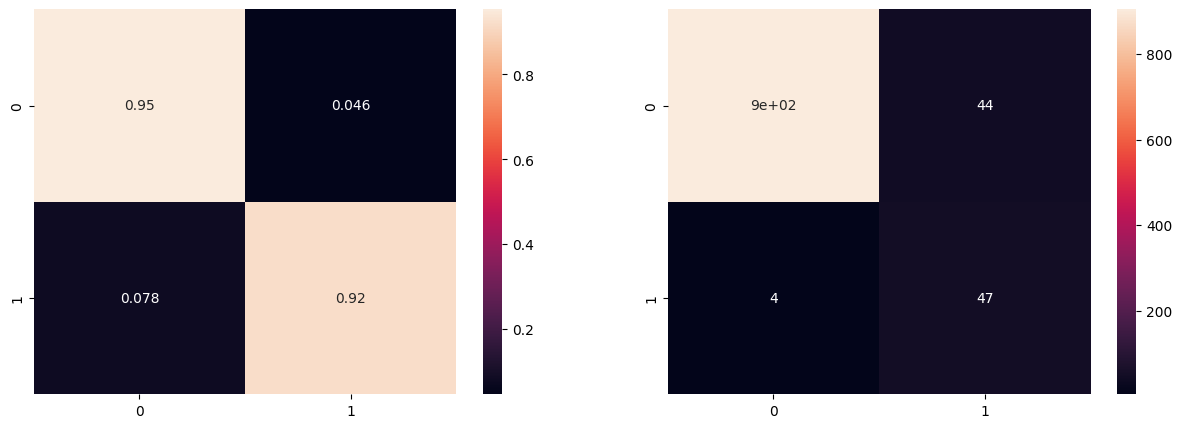

In [11]:
utils.evaluate_model(model=cnn, x_test=x_test, y_test=y_test)

### Training the involution-only model

In [12]:
inn = models.involution_only_model(
    rows=num_rows, 
    columns=num_columns,
    output_dim=1, # binary output
)

compiling the involution model...


In [13]:
inn.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
300/300 [==============================] - 4s 7ms/step - loss: 0.7654 - accuracy: 0.5026
Epoch 2/5
300/300 [==============================] - 2s 7ms/step - loss: 0.7071 - accuracy: 0.5043
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.4949 - accuracy: 0.7179
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.2854 - accuracy: 0.8927
Epoch 5/5
300/300 [==============================] - 2s 6ms/step - loss: 0.2475 - accuracy: 0.8995


32/32 [==============================] - 0s 3ms/step
Test Accuracy: 91.70%
ROC-AUC: 90.06%
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       949
           1       0.37      0.88      0.52        51

    accuracy                           0.92      1000
   macro avg       0.68      0.90      0.74      1000
weighted avg       0.96      0.92      0.93      1000


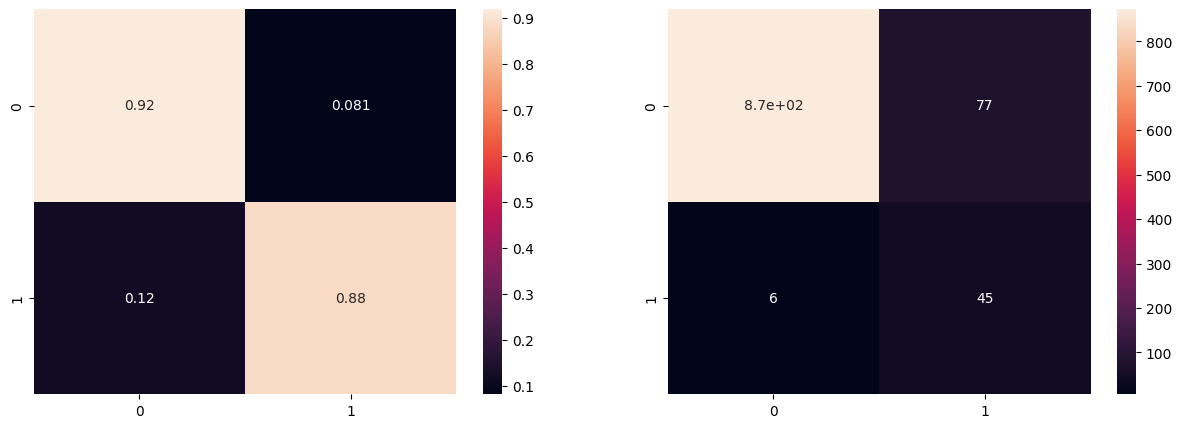

In [14]:
utils.evaluate_model(model=inn, x_test=x_test, y_test=y_test)

### Training the combined model

In [15]:
model = models.combined_model(
    rows=num_rows, 
    columns=num_columns,
    output_dim=1, # binary output
    n_filters=12
)

compiling the combined model...


In [16]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
300/300 [==============================] - 9s 23ms/step - loss: 0.5773 - accuracy: 0.6131
Epoch 2/5
300/300 [==============================] - 8s 26ms/step - loss: 0.2702 - accuracy: 0.9034
Epoch 3/5
300/300 [==============================] - 8s 26ms/step - loss: 0.2363 - accuracy: 0.9037
Epoch 4/5
300/300 [==============================] - 7s 25ms/step - loss: 0.2249 - accuracy: 0.9051
Epoch 5/5
300/300 [==============================] - 8s 26ms/step - loss: 0.2197 - accuracy: 0.9069


32/32 [==============================] - 0s 7ms/step
Test Accuracy: 97.40%
ROC-AUC: 84.71%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       949
           1       0.77      0.71      0.73        51

    accuracy                           0.97      1000
   macro avg       0.88      0.85      0.86      1000
weighted avg       0.97      0.97      0.97      1000


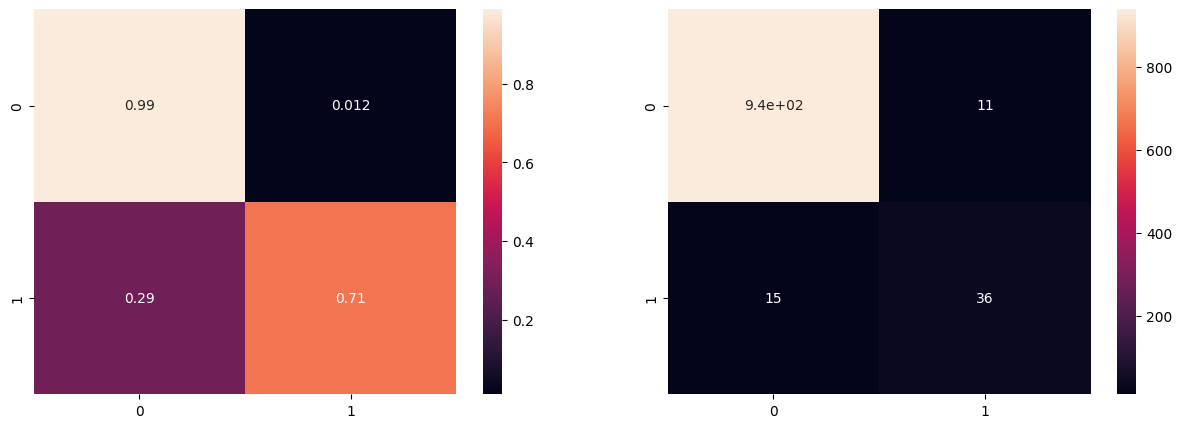

In [17]:
utils.evaluate_model(model=model, x_test=x_test, y_test=y_test)